In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as hr

%matplotlib inline

# College

##### 1

In [4]:
df = pd.read_csv('College.csv')
df.Private = pd.get_dummies(df.Private)
X = pd.DataFrame(scale(df),  columns=df.columns)

In [6]:
# PCA and get PCA loadings
pca = PCA().fit(X)
column_names = [f'V{i}' for i in range(1, len(df.columns)+1)]
pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, columns=column_names)
numV=len(df.columns)
pca_loadings['dist'] = abs(np.array(pca_loadings.V2)/ np.array(pca_loadings.V1))
a = pca_loadings.sort_values(by=['dist'])
print(a)

                   V1        V2        V3        V4        V5        V6  \
Top10perc    0.360349 -0.016238  0.004681 -0.107519 -0.388227 -0.059923   
Top25perc    0.344751  0.017730 -0.058948 -0.146260 -0.409809  0.020615   
Expend       0.333011 -0.070291  0.217318  0.007201  0.057088 -0.284475   
Terminal     0.303868  0.104192 -0.146720 -0.460404  0.265562  0.138323   
Room.Board   0.266534 -0.093979  0.182114  0.182427  0.526257  0.183029   
PhD          0.303254  0.116191 -0.208486 -0.464586  0.205949  0.071892   
Grad.Rate    0.273086 -0.117830 -0.172615  0.268200 -0.141187  0.221848   
Outstate     0.327664 -0.191518  0.066363  0.128799  0.203252 -0.020296   
perc.alumni  0.236659 -0.194061 -0.159443  0.010001 -0.215141 -0.051661   
S.F.Ratio   -0.210260  0.204395 -0.292254 -0.074900 -0.051540  0.469366   
Books        0.057189  0.057338  0.662310 -0.089301 -0.158557  0.648309   
Apps         0.199630  0.343621  0.004821  0.305009 -0.022968 -0.008618   
Accept       0.153797  0.

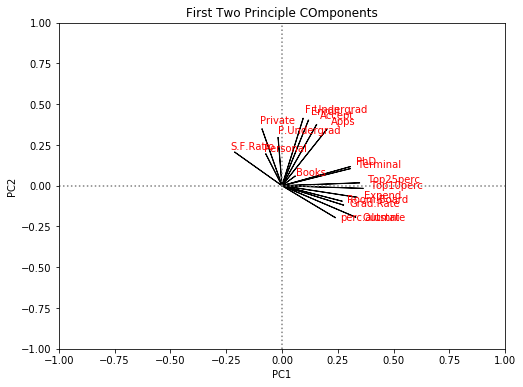

In [10]:
# create a plot PCA function
def plot_pca(pca_loadings, xmin, xmax, ymin, ymax,numV):
    
    fig , ax = plt.subplots(figsize=(8,6))

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Plot reference lines
    ax.hlines(0,xmin, xmax, linestyles='dotted', colors='grey')
    ax.vlines(0,ymin, ymax, linestyles='dotted', colors='grey')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
    a = 1.1
    for i in pca_loadings[['V1', 'V2']].index:
        ax.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')

    # Plot vectors
    for i in range(numV):
        ax.arrow(0,0,pca_loadings.V1[i], pca_loadings.V2[i])
    ax.set_title('First Two Principle COmponents')
    return ax
plot_pca(pca_loadings, -1,1,-1,1,numV)

From the graph above, we can see that the first component is mostly correlated with 'Top10perc', 'Top20perc', 'Expend', 'Terminal', 'PhD', 'Room.Board', 'Grad.Rate'. 
And the second component is mostly correlated with 'F.Undergrad', 'P.Undergrad', 'Peronal, Private', 'Enroll' and etc.

##### 2

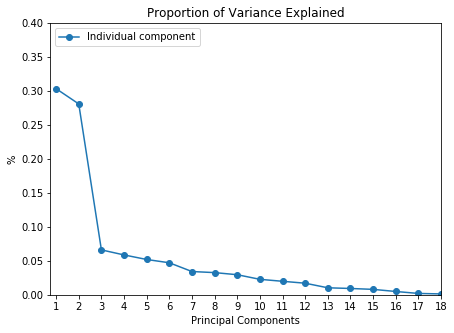

In [14]:
# plot scree plot
def plot_cum(pca,numV):    
    plt.figure(figsize=(7,5))

    plt.plot(list(range(1,numV+1)), pca.explained_variance_ratio_, '-o', label='Individual component')

    plt.title('Proportion of Variance Explained')
    plt.xlabel('Principal Components')
    plt.ylabel('%')
    plt.xlim(0.75,4.25)
    plt.ylim(0,0.4)
    plt.xticks(list(range(1,numV+1)))
    plt.legend(loc=2);
plot_cum(pca,numV)

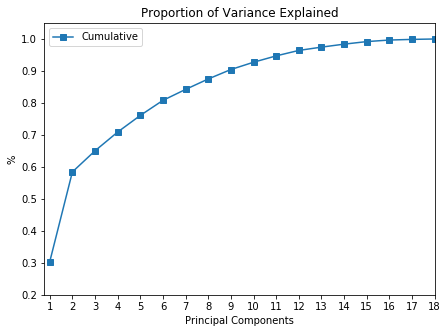

In [17]:
# plot cummulative plot
def plot_cum(pca,numV):    
    plt.figure(figsize=(7,5))

    plt.plot(list(range(1,numV+1)), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

    plt.title('Proportion of Variance Explained')
    plt.xlabel('Principal Components')
    plt.ylabel('%')
    plt.xlim(0.75,4.25)
    plt.ylim(0.2,1.05)
    plt.xticks(list(range(1,numV+1)))
    plt.legend(loc=2);
plot_cum(pca,numV)

In [19]:
print(f'The first two Principal components explain {round(pca.explained_variance_ratio_[:2].sum()*100,2)}% of the variance.')

The first two Principal components explain 58.42% of the variance.


# Clustering states

##### 1

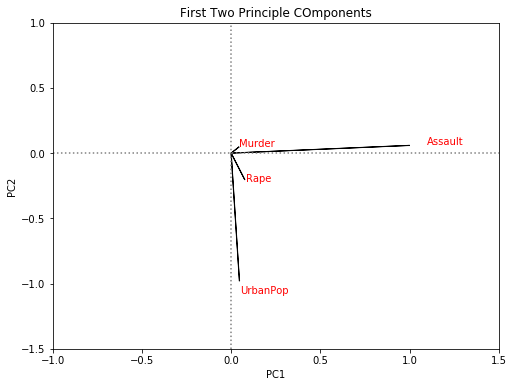

In [11]:
# Perform PCA on the dataset and plot the observations on the first and second principal components.

df2 = pd.read_csv('USArrests.csv', index_col=0)
X2 = pd.DataFrame(scale(df2), index=df2.index, columns=df2.columns)
column_names2 = [f'V{i}' for i in range(1, len(df2.columns)+1)]
PC_names = [f'PC{i}' for i in range(1, len(df2.columns)+1)]
numV2=len(df2.columns)

pca2 = PCA().fit(X2)
pca_loadings2 = pd.DataFrame(pca2.components_.T, index=df2.columns, columns=column_names2)
# pca_loadings
# plot_pca(pca_loadings2,-1,1,-1,1,numV2)
df_plot = pd.DataFrame(pca2.fit_transform(X2), columns=PC_names, index=X2.index)

pca2_full = PCA().fit(df2)
pca_loadings2_full = pd.DataFrame(pca2_full.components_.T, index=df2.columns, columns=column_names2)
df_plot_full = pd.DataFrame(pca2_full.fit_transform(df2), columns=PC_names, index=X2.index)
plot_pca(pca_loadings2_full,-1,1.5,-1.5,1,numV2)

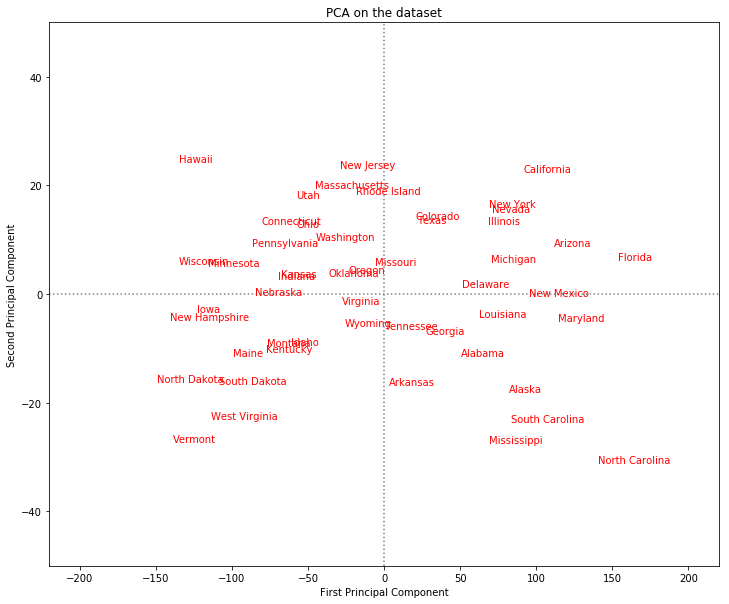

In [23]:
fig , ax1 = plt.subplots(figsize=(12,10))
x_min = -220
x_max = 220
y_min = -50
y_max = 50

ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Plot Principal Components 1 and 2
for i in df_plot_full.index:
    ax1.annotate(i, (df_plot_full.PC1.loc[i], -df_plot_full.PC2.loc[i]), ha='center', color='r')

# Plot reference lines
ax1.hlines(0,x_min, x_max, linestyles='dotted', colors='grey')
ax1.vlines(0,y_min, y_max, linestyles='dotted', colors='grey')

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PCA on the dataset')

##### 2 

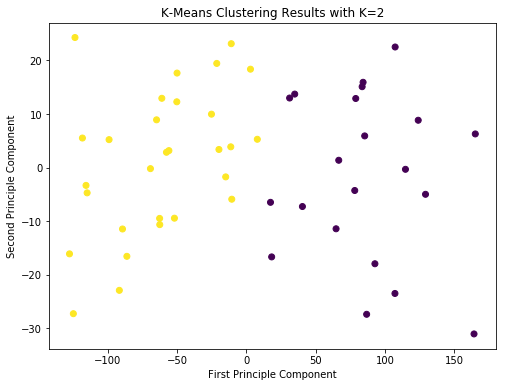

In [39]:
km2 = KMeans(n_clusters=2, n_init=20).fit(df2)
km3 = KMeans(n_clusters=3, n_init=20).fit(df2)
km4 = KMeans(n_clusters=4, n_init=20).fit(df2)

fig,(ax1) = plt.subplots(1, figsize=(8,6))
ax1.set_xlabel('First Principle Component')
ax1.set_ylabel('Second Principle Component')
ax1.set_title(f'K-Means Clustering Results with K=2')
temp = []
pca2_full.fit_transform(km2.cluster_centers_)
ax1.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km2.labels_) 
ax1.scatter(temp, temp, marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

##### 3

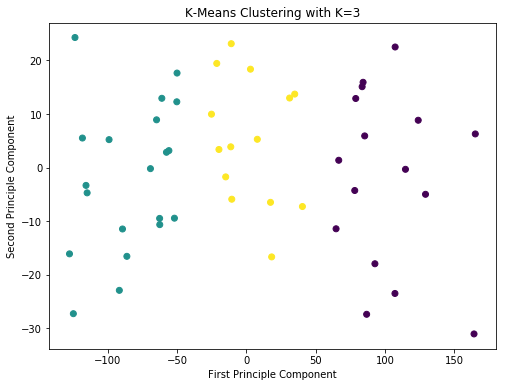

In [49]:
fig,(ax2) = plt.subplots(1, figsize=(8,6))
ax2.set_xlabel('First Principle Component')
ax2.set_ylabel('Second Principle Component')
ax2.set_title(f'K-Means Clustering with K=3')
temp = []
pca2_full.fit_transform(km3.cluster_centers_)
ax2.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km3.labels_) 
ax2.scatter(temp, temp, marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

##### 4

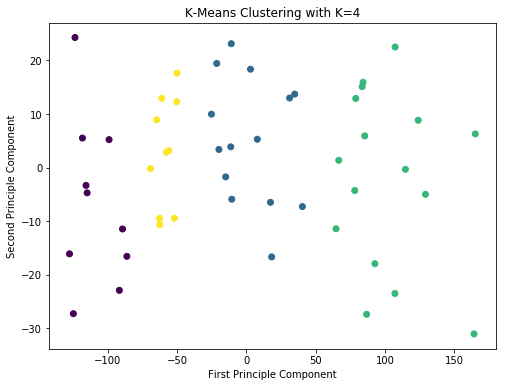

In [50]:
fig,(ax3) = plt.subplots(1, figsize=(8,6))
ax3.set_xlabel('First Principle Component')
ax3.set_ylabel('Second Principle Component')
ax3.set_title(f'K-Means Clustering with K=4')
temp = []
pca2_full.fit_transform(km4.cluster_centers_)
ax3.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km4.labels_) 
ax3.scatter(temp, temp, marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)

##### 5

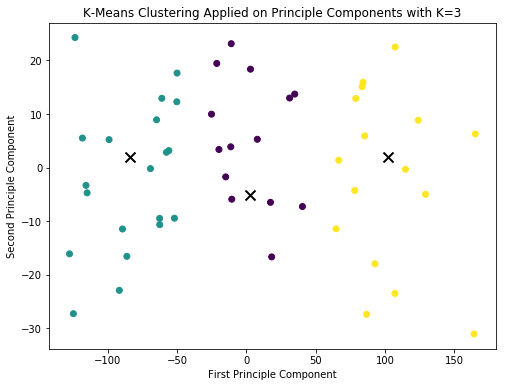

In [51]:
km3_pc = KMeans(n_clusters=3, n_init=20).fit(df_plot_full)
fig, ax = plt.subplots( figsize=(8,6))
# df_plot
ax.scatter(df_plot_full.PC1, -df_plot_full.PC2, c=km3_pc.labels_) 
ax.set_title('K-Means Clustering Applied on Principle Components with K=3')
ax.scatter(km3_pc.cluster_centers_[:,0], km3_pc.cluster_centers_[:,1], marker='x', s=100, c='k', linewidth=2, cmap=plt.cm.hsv)
ax.set_xlabel('First Principle Component')
ax.set_ylabel('Second Principle Component')

##### 6

In [52]:
d=df2.index[km3.labels_ != km3_pc.labels_]
if list(d):
    print(f'The centeroid positions are different. {", ".join(list(d))} now belong to different groups.')
else:
    print ('The centeroid positions are different. However, all data belong to the original group.')

The centeroid positions are different. Alabama, Alaska, Arizona, Arkansas, California, Colorado, Delaware, Florida, Georgia, Illinois, Louisiana, Maryland, Massachusetts, Michigan, Mississippi, Missouri, Nevada, New Jersey, New Mexico, New York, North Carolina, Oklahoma, Oregon, Rhode Island, South Carolina, Tennessee, Texas, Virginia, Washington, Wyoming now belong to different groups.


##### 7

The states in group 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.
The states in group 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.
The states in group 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.


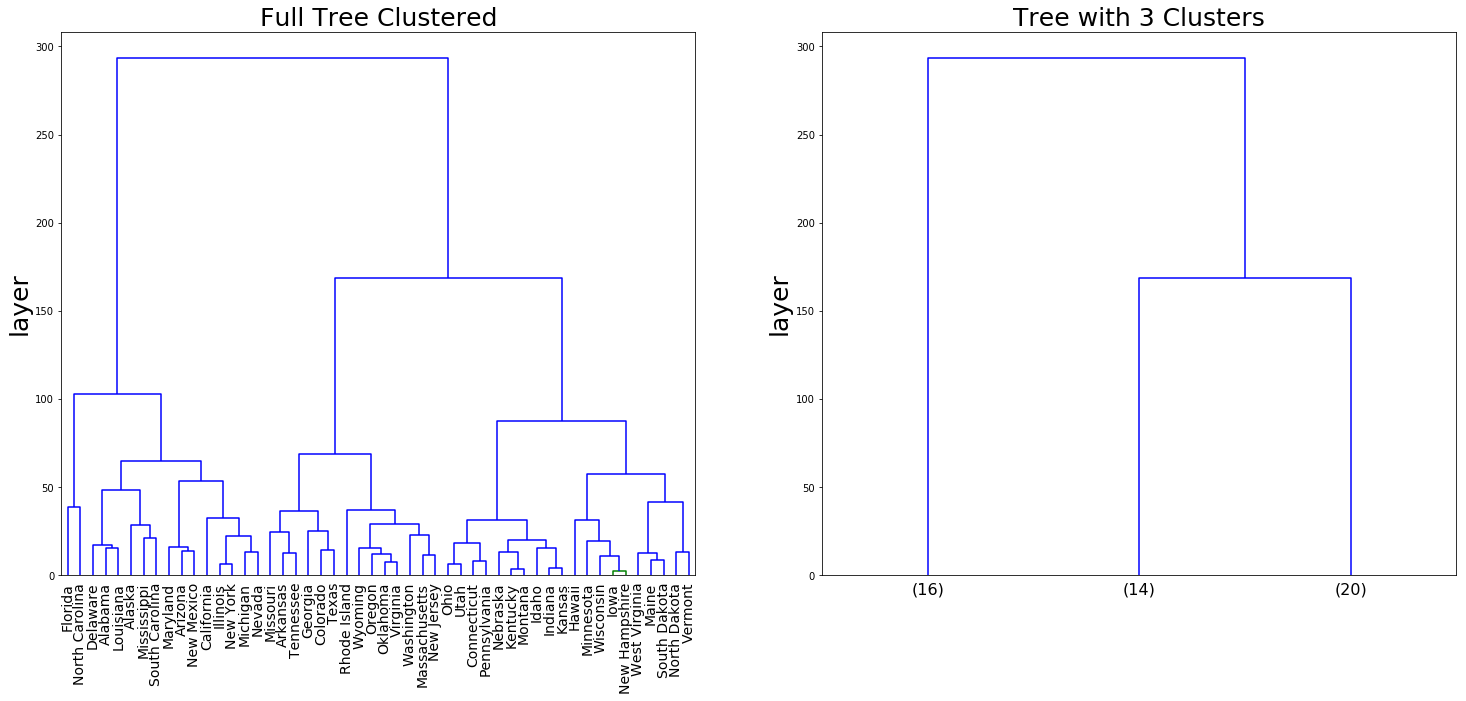

In [55]:
Z = hr.complete (df2)
def plot_cluster(tree,n):
    fig,(ax1, ax2) = plt.subplots(1,2, figsize=(25, 10))
    cuttree = hr.fcluster(tree,n,criterion='maxclust')
    cuttree_cat=pd.Series(cuttree, dtype="category")
    temp=pd.Series(df2.index).groupby(cuttree_cat)
    dn = dendrogram(tree,labels=X2.index,  color_threshold=n, leaf_font_size=14, ax=ax1)
    dn2 = dendrogram(tree,truncate_mode='lastp', p=n, color_threshold=4, leaf_font_size=16, ax=ax2)
    [i.set_ylabel('layer',fontsize = 25) for i in (ax1, ax2)]
    ax1.set_title('Full Tree Clustered',fontsize=25)
    ax2.set_title(f'Tree with {n} Clusters',fontsize=25)
    for group, state in temp:
        print (f'The states in group {group} are {", ".join(list(state))}.')
plot_cluster(Z,3)

##### 8

The states in group 1 are Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming.
The states in group 2 are Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas.
The states in group 3 are Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee.


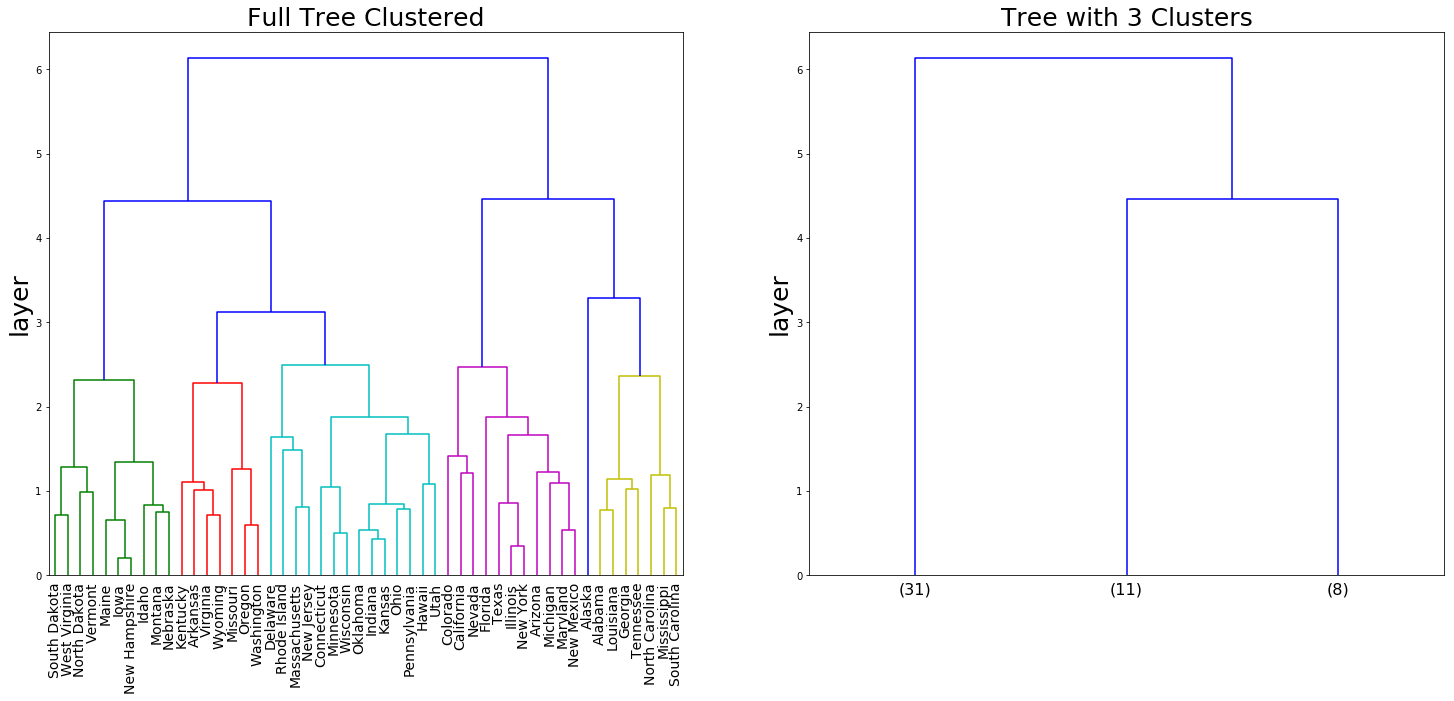

In [56]:
Z2 = hr.complete (X2)
plot_cluster(Z2,3)